In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 24.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 33.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 84.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=0b4451a8aa3a91c39842b3fe8380f8e6b65e7ac1c3ad737119ec124fc1e81a79
  Stored in directory: /home/ec2-user/.cache/pip/wheels/62/4a/9c/7a46699df9efb845aa116fae5e52d8690fc442fef6d32213f7


In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...


True

# Step 2: Authentication for Twitter API

In [3]:
# Authentication
consumerKey = "2CJbp8m7Rg26LtZEKAeVXWceG"
consumerSecret = "IbULWKlS0uvhLnMTcFkzvMjDfZUcBM6eVbdLYMUbNafhieX8Y6"
accessToken = "1119095264961126402-8QDK0FvTjGmV7w1hUtGsTyCyH77bNE"
accessTokenSecret = "unheMaBnZsHrcBt3mK1bE8Ib4wtE3tPtAwSA65Y0zWIK0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [4]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search: UCM
Please enter how many tweets to analyze: 200


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  200
positive number:  45
negative number:  34
neutral number:  121


In [6]:
tweet_list[0:20]

,0
0,RT @MarvelBRNews: Capitão América decidido a i...
1,RT @MarvelBRNews: Capitão América decidido a i...
2,Meier works out of a bases loaded jam in the 7...
3,Elizabeth Olsen disse que não volta como Wanda...
4,RT @MarvelBRNews: Capitão América decidido a i...
5,RT @MarvelBRNews: Capitão América decidido a i...
6,"@VozFriki @FanGeekBGMM Hombre, si fuese del UC..."
7,@MarvelBRNews o homem aranha faria o mesmo\nes...
8,@Emiliosteinsimp Yo es la peli que más espero ...
9,RT @BComplutense: ¡Participa en el sorteo para...


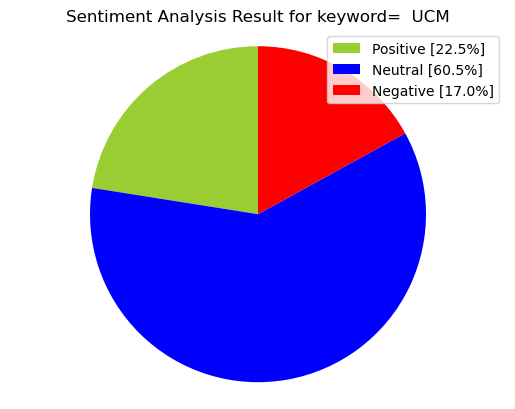

In [6]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [7]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [8]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,🎥🎬 Ya disponible en el canal la #crítica de #G...,🎥🎬 Ya disponible en el canal la #crítica de #G...
1,RT @soypietro1: Cada día qué pasa me convenzo ...,RT @soypietro1: Cada día qué pasa me convenzo ...
2,RT @peterjordan100: Geral falando bem de Guard...,RT @peterjordan100: Geral falando bem de Guard...
3,RT @habitaciondcine: Directa al Top de las pel...,RT @habitaciondcine: Directa al Top de las pel...
4,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...
...,...,...
189,@_CapClark1 @Mz_UcM https://t.co/chNCLQ5iho,@_CapClark1 @Mz_UcM https://t.co/chNCLQ5iho
190,"El ""Hulk"" del Eduard Norton debió estar en el ...","El ""Hulk"" del Eduard Norton debió estar en el ..."
192,@jackfreemanjr @Mz_UcM For sure.,@jackfreemanjr @Mz_UcM For sure.
197,@Mz_UcM Hey @_CapClark1 maybe you or Chris can...,@Mz_UcM Hey @_CapClark1 maybe you or Chris can...


In [11]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,🎥🎬 Ya disponible en el canal la #crítica de #G...,ya disponible en el canal la cr tica de g...
1,RT @soypietro1: Cada día qué pasa me convenzo ...,cada d a qu pasa me convenzo m s que los re...
2,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...
3,RT @habitaciondcine: Directa al Top de las pel...,directa al top de las pel culas del ucm gua...
4,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...,ni se estrena y ya la odian themarvels ...
6,"@JamesGunn te amo, gracias por la mejor trilog...",te amo gracias por la mejor trilog a del ucm
8,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm
9,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...
10,RT @peterjordan100: Saiu video do Raluca e a g...,saiu video do raluca e a galera ta mais hypad...
12,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...


In [12]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_8047/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,🎥🎬 Ya disponible en el canal la #crítica de #G...,ya disponible en el canal la cr tica de g...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @soypietro1: Cada día qué pasa me convenzo ...,cada d a qu pasa me convenzo m s que los re...,0.2,0.300000,positive,0.000,0.877,0.123,0.4215
2,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
3,RT @habitaciondcine: Directa al Top de las pel...,directa al top de las pel culas del ucm gua...,0.5,0.500000,positive,0.000,0.833,0.167,0.2023
4,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...,ni se estrena y ya la odian themarvels ...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
6,"@JamesGunn te amo, gracias por la mejor trilog...",te amo gracias por la mejor trilog a del ucm,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
8,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm,0.5,0.500000,positive,0.000,0.625,0.375,0.2023
9,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...,0.0,0.066667,negative,0.165,0.688,0.147,-0.1027
10,RT @peterjordan100: Saiu video do Raluca e a g...,saiu video do raluca e a galera ta mais hypad...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
12,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000


In [13]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [14]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [15]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,52,63.41
positive,16,19.51
negative,14,17.07


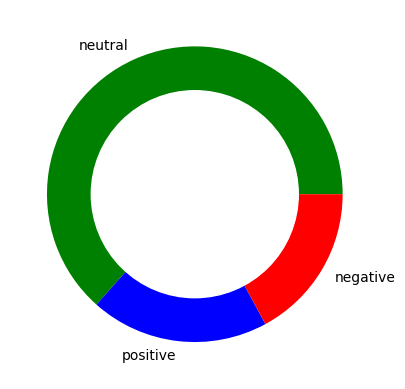

In [16]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [17]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



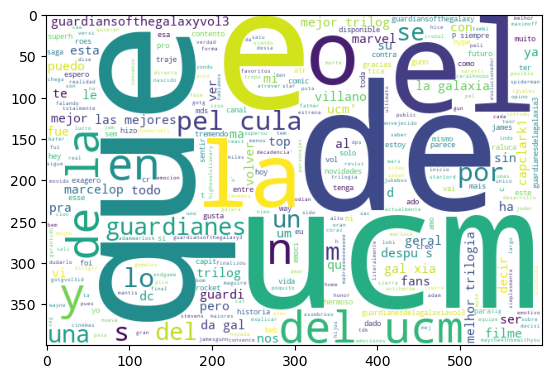

In [19]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

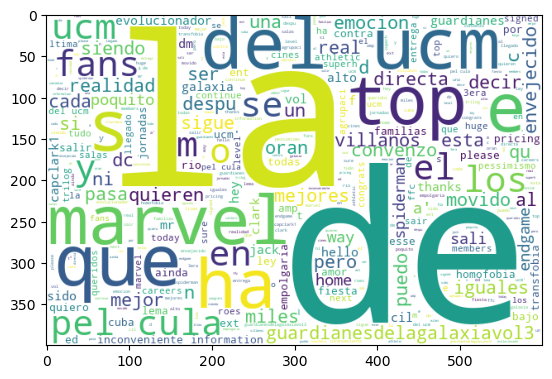

In [20]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

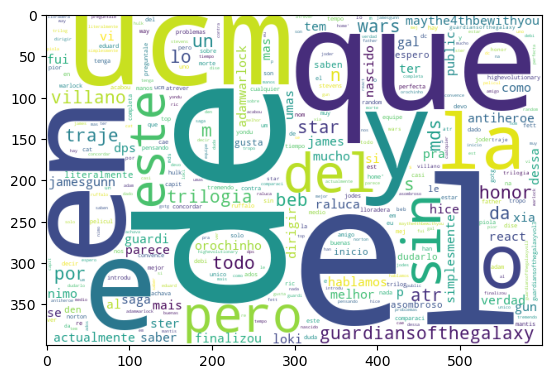

In [21]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

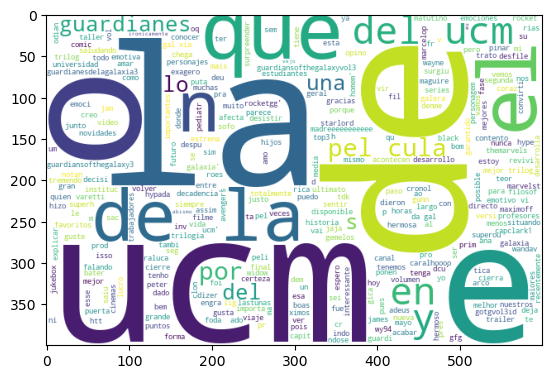

In [22]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)